## Diamond Price Prediction

1. Installing Required Libraries

In [1]:
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<ipython-input-1-8cad4d6f4106>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2. Reading the Dataset

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


3. Inspecting the Dataset Shape

In [3]:
df.shape

(50000, 10)

4. Checking Data Types and Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


5. Descriptive Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80


6. Message: Count unique values in categorical columns

In [6]:
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts())

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64 
 color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64 
 clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64


In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


7. Visualize distribution of 'price' column

<AxesSubplot:xlabel='price', ylabel='Count'>

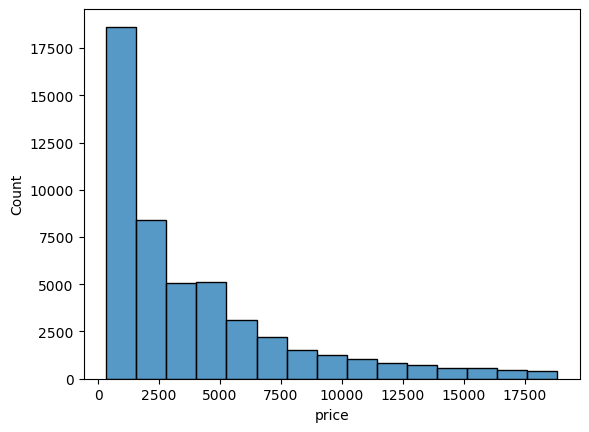

In [8]:
sns.histplot(df['price'],bins = 15)

8. Visualize distribution of 'carat' column

<AxesSubplot:xlabel='carat', ylabel='Count'>

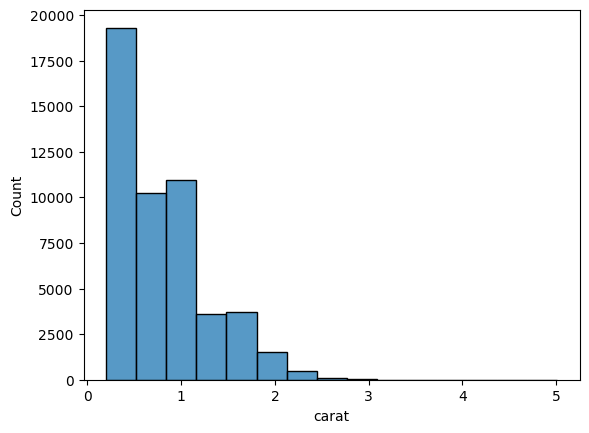

In [9]:
sns.histplot(df['carat'],bins=15)

9. Visualize the 'cut' distribution with a pie chart

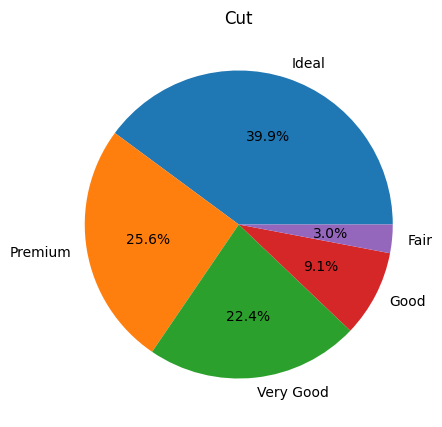

In [10]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

10. Visualize the 'color' distribution with a bar chart

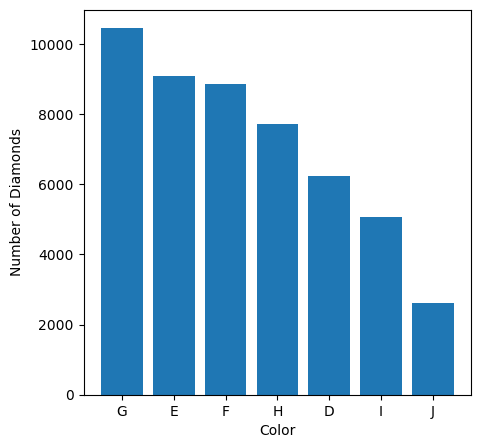

In [11]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

11. Visualize the 'clarity' distribution with a bar chart

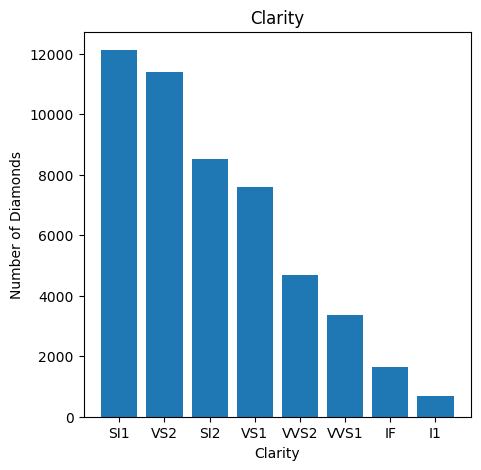

In [12]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

12. Visualize the 'table' distribution with a histogram

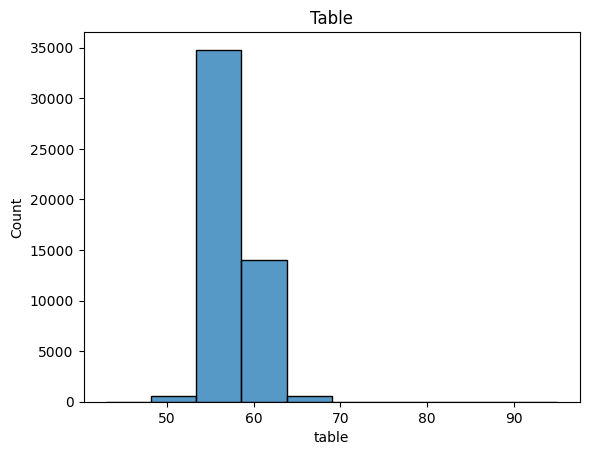

In [13]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

13. Visualize 'Price vs Cut' using a barplot

<AxesSubplot:xlabel='cut', ylabel='price'>

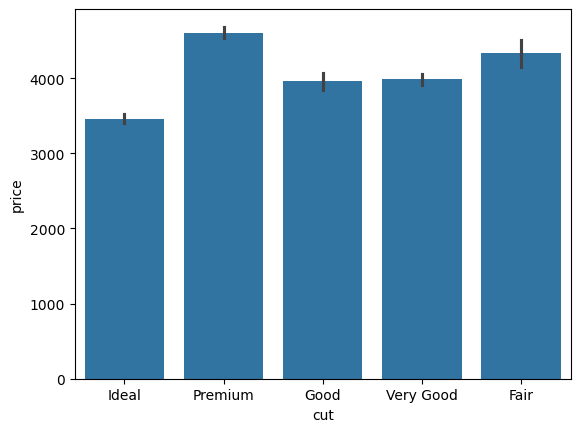

In [14]:
sns.barplot(x='cut',y='price',data=df)

14. Visualize 'Price vs Color' using a barplot

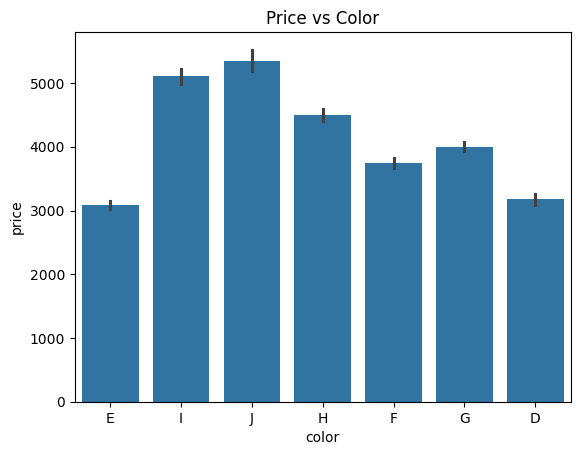

In [15]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

15.  Visualize 'Price vs Clarity' using a barplot

<AxesSubplot:xlabel='clarity', ylabel='price'>

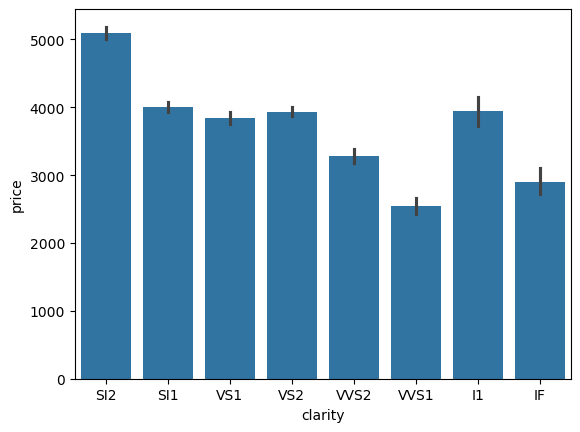

In [16]:
sns.barplot(x = 'clarity', y = 'price', data = df)

16. Map categorical variables to numerical values

In [17]:
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

17. Check correlation matrix

In [18]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.291530,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.019548,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
color,-0.291530,0.019548,1.000000,-0.026056,-0.047426,-0.027513,-0.172629,-0.270529,-0.263395,-0.268388
clarity,-0.352435,0.189024,-0.026056,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.047426,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.027513,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.172629,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.270529,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.263395,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.268388,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


18. Visualize the correlation matrix with a heatmap

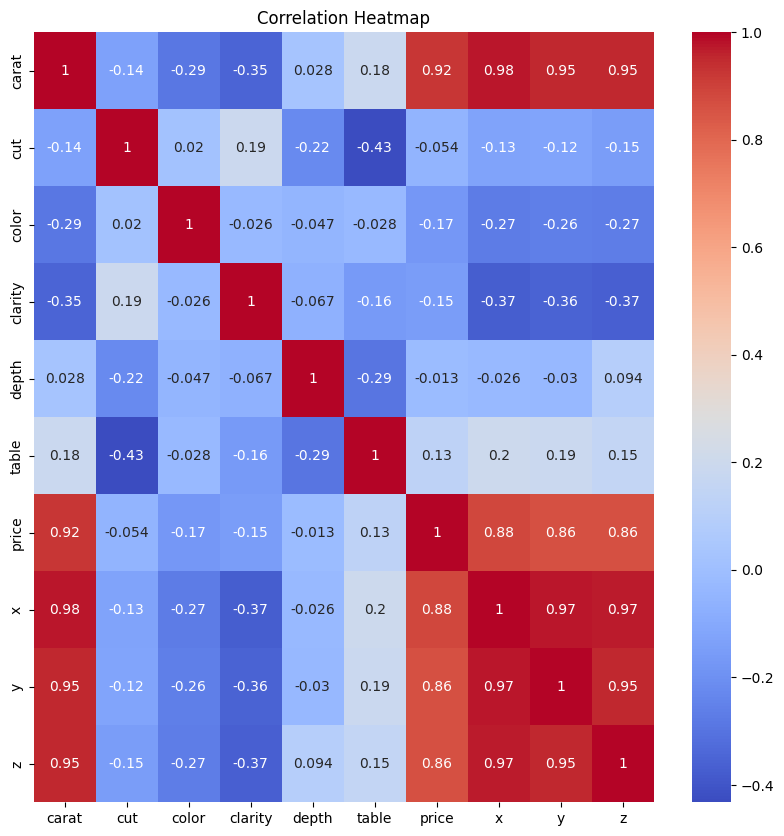

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

19. Visualize 'Carat vs Price' using a line plot

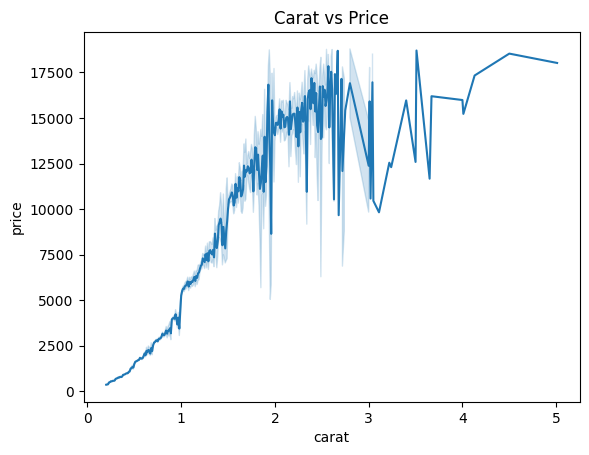

In [20]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

20.  Visualize scatter plots for multiple variables

fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

21. Train-Test Split for Regression

In [22]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(40000, 9), y_train=(40000,)
Testing data shape: X_test=(10000, 9), y_test=(10000,)


21. linear regression

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(X_test)

In [25]:
print("Linear Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Linear Regression Evaluation:
MAE: 786.32
MSE: 1407745.59
R²: 0.91


22. decision tree regression

In [26]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
y_pred = dt_reg.predict(X_test)

In [28]:
print("Decision Tree Regressor Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Decision Tree Regressor Evaluation:
MAE: 359.03
MSE: 564437.91
R²: 0.96


23. random forest regressor

In [29]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = rf_reg.predict(X_test)

In [31]:
print("Random Forest Regressor Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Random Forest Regressor Evaluation:
MAE: 262.94
MSE: 277824.99
R²: 0.98


24. gradient boostig regressor

In [32]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [33]:
y_pred = gb_reg.predict(X_test)

In [34]:
print("Gradient Boosting Regressor Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

Gradient Boosting Regressor Evaluation:
MAE: 334.37
MSE: 346646.77
R²: 0.98


25. model visualization

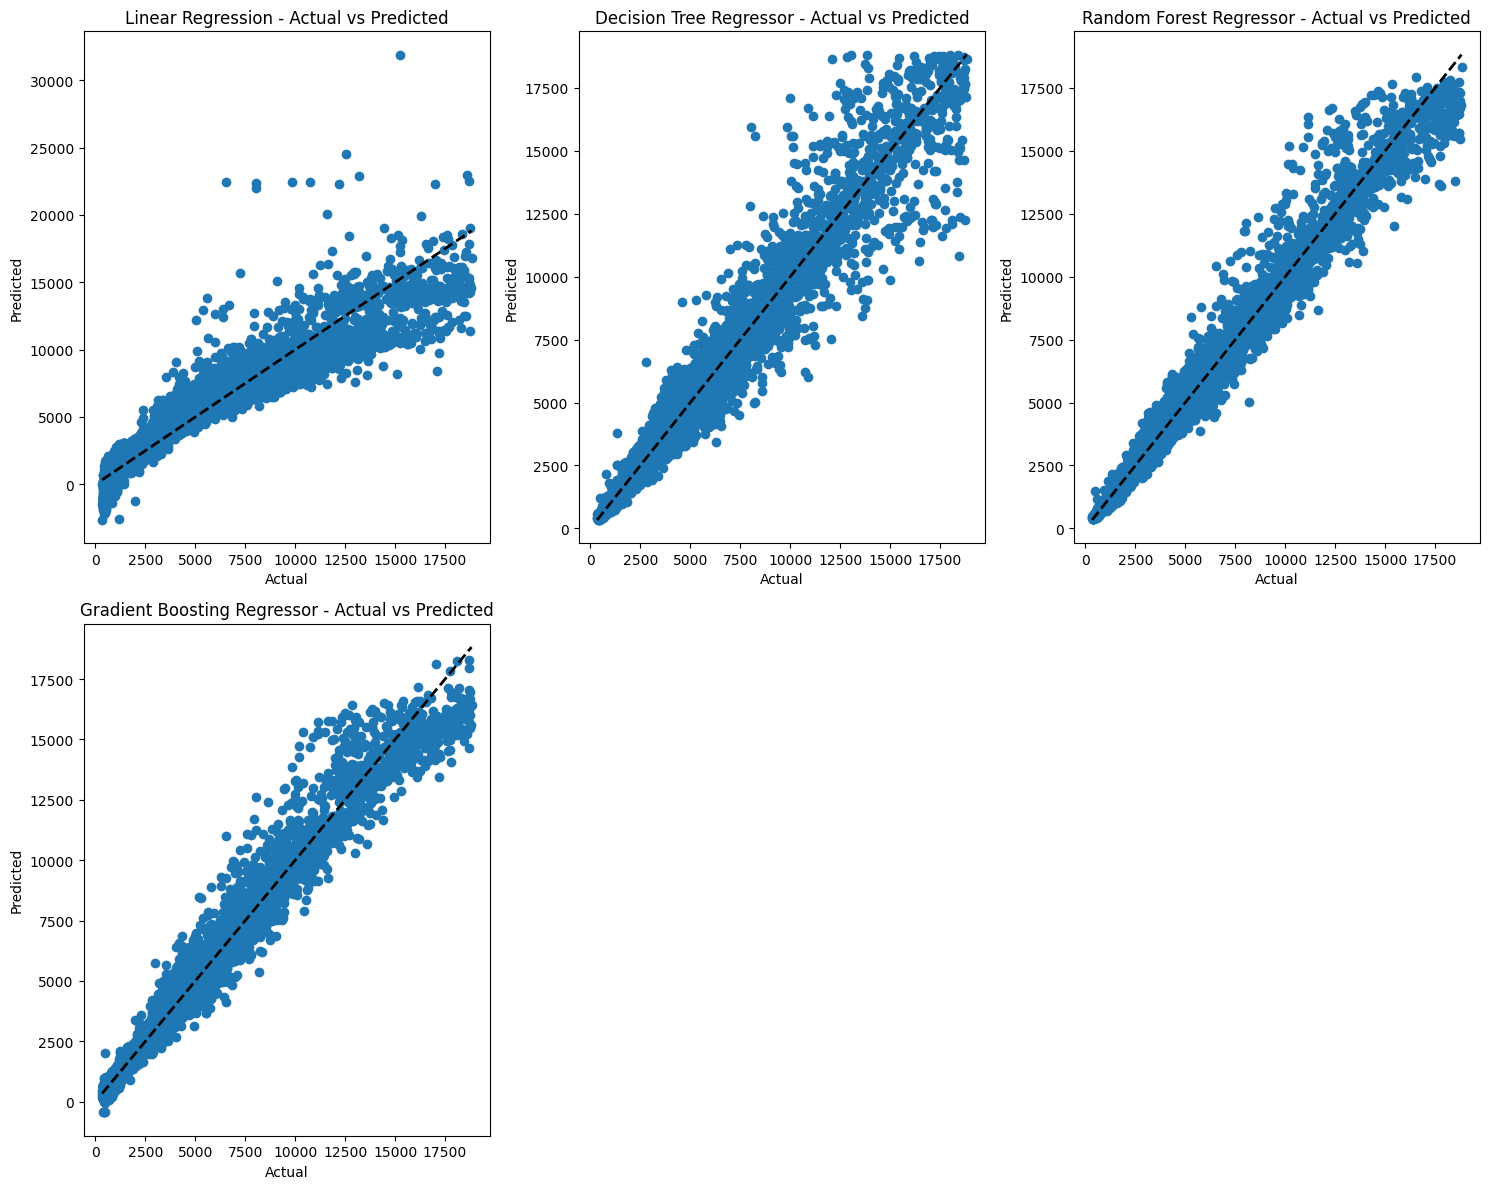

In [35]:
models = {
    "Linear Regression": linear_reg,
    "Decision Tree Regressor": dt_reg,
    "Random Forest Regressor": rf_reg,
    "Gradient Boosting Regressor": gb_reg
}
predictions = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

plt.figure(figsize=(15, 12))

for i, (model_name, y_pred) in enumerate(predictions.items()):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

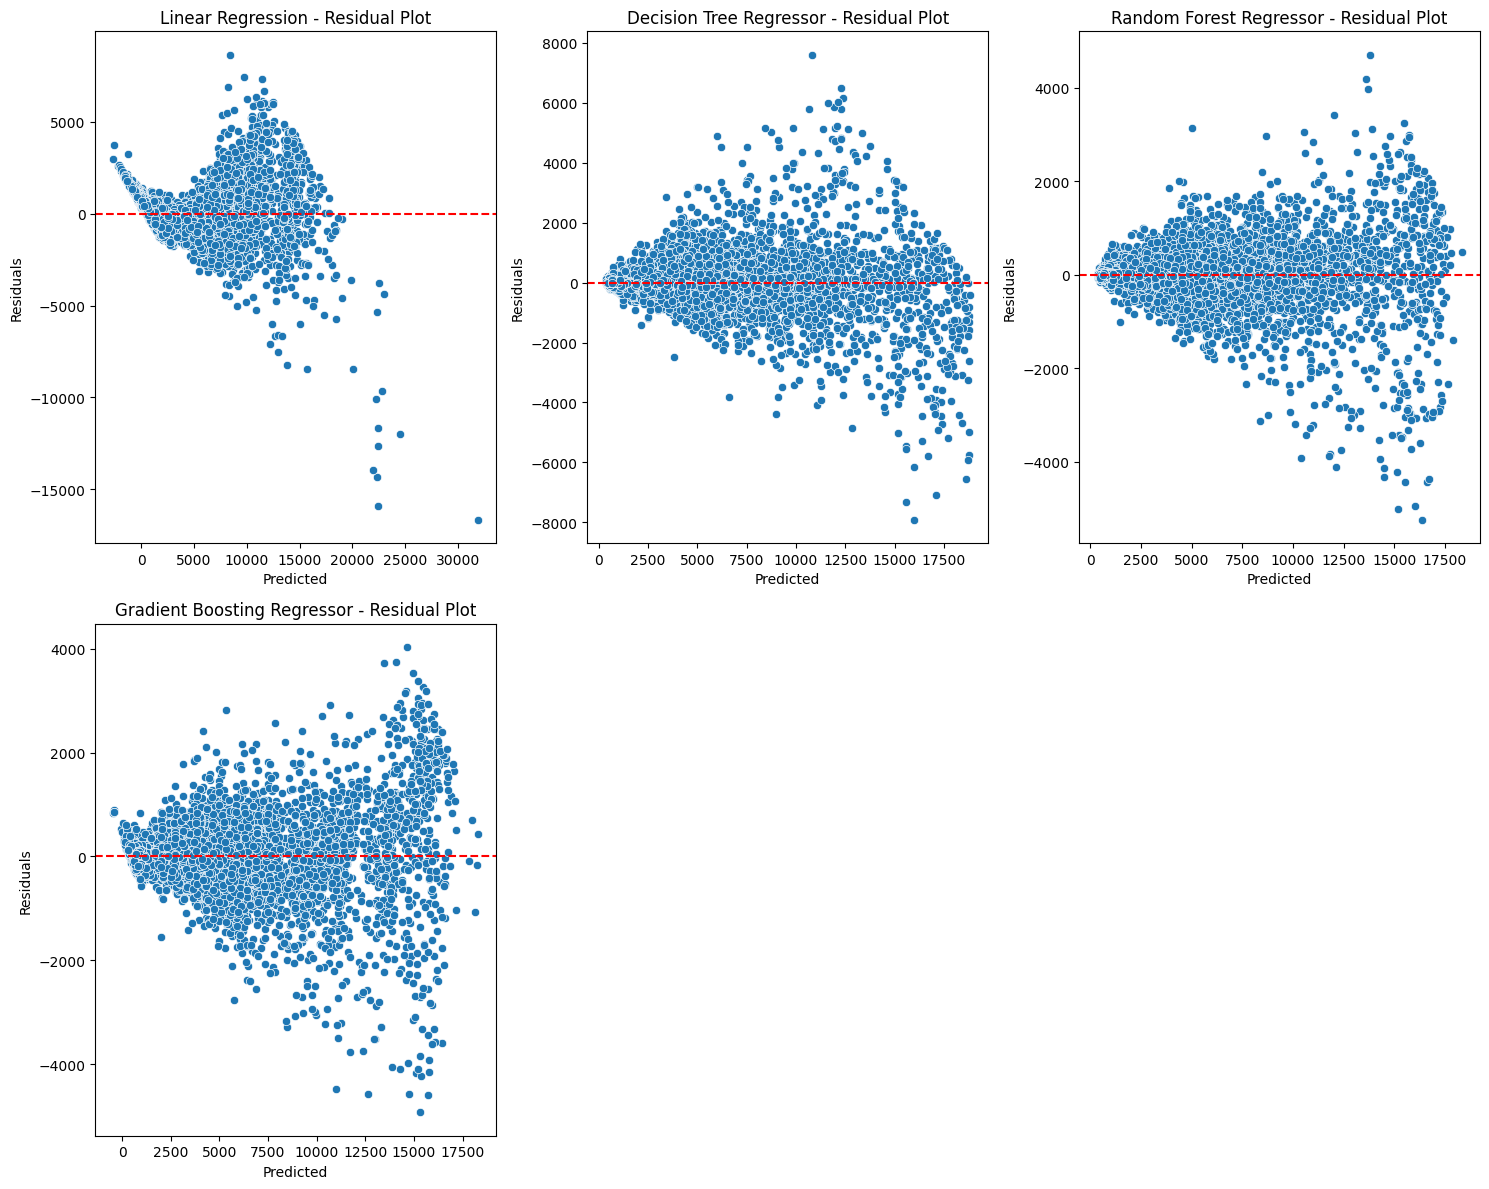

In [36]:
plt.figure(figsize=(15, 12))

for i, (model_name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{model_name} - Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

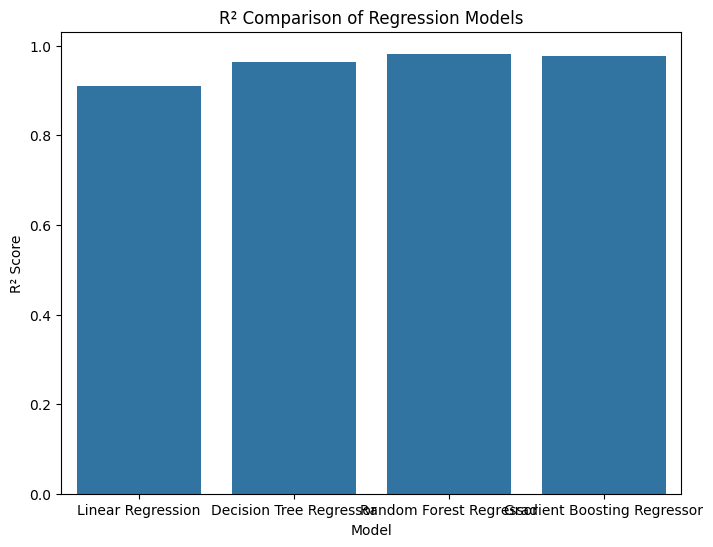

In [37]:
r2_scores = {model_name: r2_score(y_test, y_pred) for model_name, y_pred in predictions.items()}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.title('R² Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.show()

performance_metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R²": []
}

for model_name, y_pred in predictions.items():
    performance_metrics["Model"].append(model_name)
    performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred))
    performance_metrics["MSE"].append(mean_squared_error(y_test, y_pred))
    performance_metrics["R²"].append(r2_score(y_test, y_pred))


conclusion: the Random Forest Regressor model is batter then other Regressor model.